# Assignment #2

Please follow instruction below to complete your assignment. 
You are expected to provide:
- IPython notebook
- HTML export of this notebook

This assignment is due 23/04/2021. Please use code blocks to comment and explain your code.

STUDENT ID: [23617]

In [1]:
%matplotlib inline 
import os, sys
import json

import random
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

# Import any other package you may need
from pylab import *
from scipy.ndimage import measurements
from google.colab import drive
import statistics 
drive.mount("gdrive")

Mounted at gdrive


## Helper functions for data visualization

In [2]:
def visualize_grid(grid, params=None, figname=None):
    '''
    Generic data visualization function
    
    - grid: 2D numpy array that has integer values
    - params: dictionary of parameters ex: {'dim': (50,50), 'p':0.5} 
    - figname: path and name for a figure file ex: figures/sample_05.pdf
    '''
    cmap = plt.cm.get_cmap('jet', len(np.unique(grid)))
    im = plt.matshow(grid, cmap=cmap, origin='lower', interpolation='none')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    
    if params != None:
        plt.title(params, fontsize=10)
    
    if figname != None:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    

## Simulate percolation

In [3]:
def paint_grid(clusters,prevGrid):
    temp_grid = np.copy(prevGrid)
    for cluster in clusters:
      for coord in cluster:
        temp_grid[coord[0]][coord[1]] = 2.0
    return temp_grid

This function is for painting the entire percolating cluster(s) with label 2 in order to make the grid easily differentiable.

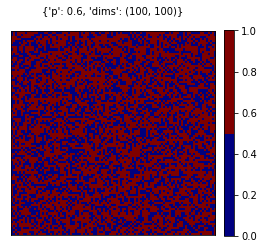

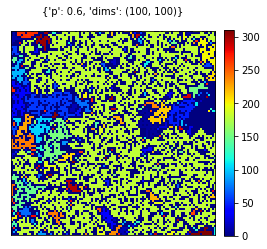

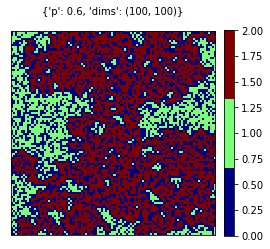

In [7]:
def create_grid(dimensions, pthr):
    '''
    Create a grid as 2D numpy array and return the grid
    - dimensions: tuple or array that has height and width of the grid ex: [50,50]
    - pthr: threshold value for occupying a cell
    '''
    grid = np.zeros(dimensions)
    # FILL HERE
    for irow,i in enumerate(grid):
      for icolumn,j in enumerate(i):
        grid[irow][icolumn] =1 if pthr>random() else 0
    return grid

def find_clusters(grid):
    '''
    Find clusters of occupied cells in the grid
    - grid: 2D numpy array
    
    Return:
    - cGrids: 2D numpy array that has a different integer values for each cluster cells
    - clusters: list of coordinates for each cluster
    '''
    clusters = list()
    cGrids = np.zeros(grid.shape)
    # FILL HERE
    # finds every connected component
    lw, num = measurements.label(grid)   
    clusters = []
    for i in range(num+1):
      temp = []
      clusters.append(temp)
    #randomizing colors (guarantees different colors for non-occupied)
    labels = arange(lw.max() + 1)
    shuffle(labels)
    #assigning them to grids
    cGrids = labels[lw]
    for irow,i in enumerate(grid):
      for icolumn,j in enumerate(i):
        cGrids[irow][icolumn] = cGrids[irow][icolumn] if grid[irow][icolumn]!=0 else 0
        if (lw[irow][icolumn]>0):
          clusters[cGrids[irow][icolumn]].append((irow,icolumn))
    return cGrids,sorted(clusters, key=len)


def check_percolation(grid, clusters):
    '''
    Check whether given grid percolated
    - grid: 2D numpy array
    
    Return:
    - grid: 2D numpy array. This function updated the value of grid to reflect percolating component
    - percCluster: coordinates of the cells in the percolating component
    '''
    clusters = sorted(clusters, key=len)
    percCluster = []
    temp_grid = np.zeros(grid.shape)
    # search for percolated cluster(s)
    for cluster in list(sorted(clusters,key=len,reverse=False)):
      # open sites
      left = []
      right = []
      up = []
      down = []
      # for every coordinate we check whether there exists an open site
      for coord in cluster:
        if (coord[0]==0):
          up.append(coord)
        elif (coord[1]==0):
          left.append(coord)
        elif (coord[0]==grid.shape[0]-1):
          down.append(coord)
        elif (coord[1]==grid.shape[0]-1):
          right.append(coord)
        # if any cluster connected to open sites from up to down or left to right is found 
        # current cluster percolates
        if (len(down)>0 and len(up)>0):
          percCluster.append(cluster)
          break
        elif (len(left)>0 and len(right)>0):
          percCluster.append(cluster)
          break
    # if any percolating cluster(s) found, paint_grid paints them to grid and returns them 
    if (len(percCluster)>0):
      return paint_grid(percCluster,grid), percCluster
    return temp_grid, None

pval = 0.60
dims = (100,100)
rgrid = create_grid(dims, pval)
visualize_grid(rgrid, {'p':pval, 'dims':dims})

cgrid,clusters = find_clusters(rgrid)
visualize_grid(cgrid, {'p':pval, 'dims':dims})

pgrid, pcluster = check_percolation(rgrid, clusters)
visualize_grid(pgrid, {'p':pval, 'dims':dims})


Initially we first occupy cells with respect to a probability. In create_grid function we assign a variable in order to define the grid. After the grid is generated, we traverse every cell and check whether the generated number outruns the occupation threshold. If the occupation probability outruns the random number, then we assign 1 to the respective cell.

In find_cluster function we initially label every cluster via the implemented  scipy.ndimage.measurements.label function. As a result, this method returns number of clusters and the labelled grid from top to bottom. Then we shuffle the labels in order to obtain a more spanned color spectrum on closer clusters.
Every cluster and its respective coordinate is collected from the grid and returned as a result for find_cluster function with the labelled grid as well.

Finally in check_percolation function, we traverse every cluster and check whether the observed cluster shares any coordinates from left most to right most or up most to down most. If any of the previously mentioned conditions are met, the system shares a percolating cluster and this cluster is saved as a percolating cluster. Resulting cluster is 

In [13]:
try:
    os.remove("/content/gdrive/MyDrive/percolation-figures/percolation_experiments.jsons")
except OSError:
    pass

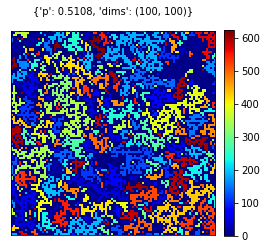

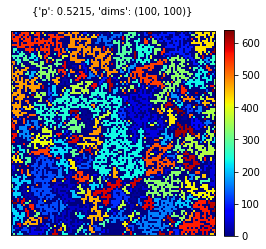

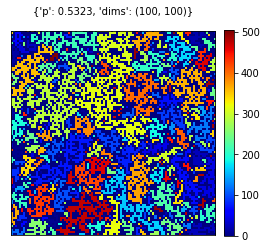

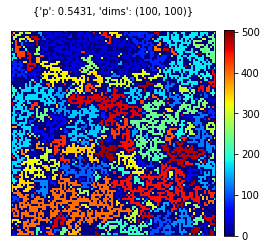

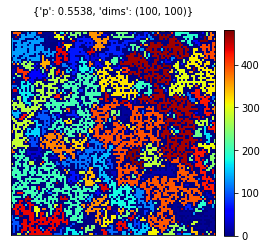

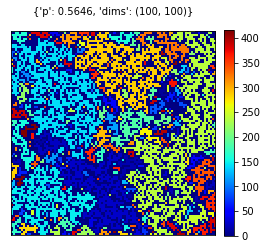

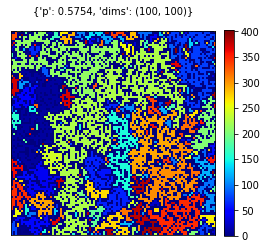

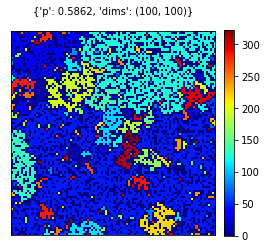

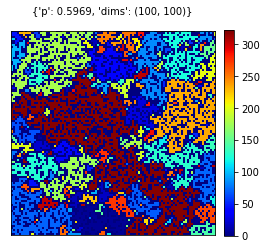

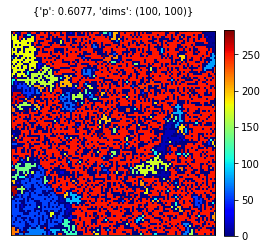

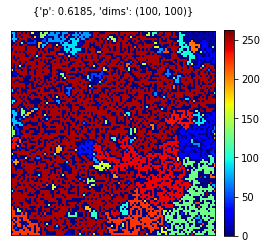

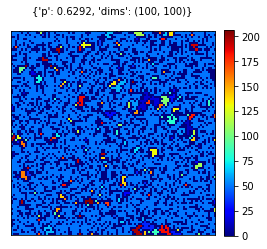

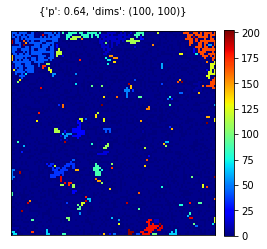

In [14]:
# You can change the parameters below.
NRANDOM = 50
DIMS = (100,100)

pExplore = np.linspace(0,1,21)[1:]
pExpand = np.linspace(0.5,0.64,14)[1:] # Update this array to find more accurate estimation.
expResults = list()
for n in range(NRANDOM):
    
    # You can run simulation for pExplore and pExpand values seperately and repeat pExpand if needed.
    #for pval in pExplore:   
    for pval in pExpand: 
        rgrid = create_grid(DIMS, pval)
        cgrid, clusters = find_clusters(rgrid)
        pgrid, pclusters = check_percolation(rgrid, clusters)
        
    
        if n == 0:
            # Sample one outcome for each parameter
            visualize_grid(cgrid, {'p':np.round(pval,4), 'dims':dims},figname='/content/gdrive/MyDrive/percolation-figures/percvis_p{:.4f}.pdf'.format(pval))
        
        # I recommend keeping all the experiment results in a file, 
        # so that you will have them all before your analysis
        expResults.append({
            'p': pval,
            'idx': n,
            'dim': DIMS,
            'isPercolated': pclusters != None,
            'clusters': clusters,
            'pclulen' : len(pclusters[0]) if pclusters!=None else 0
        })
        #print({k:v for k,v in expResults[-1].items() if k != 'clusters'})
        
        # Let's keep the latest experiment result on a file
        with open('/content/gdrive/MyDrive/percolation-figures/percolation_experiments.jsons', 'a') as fl:
            fl.write('{}\n'.format(json.dumps(expResults[-1])))
        

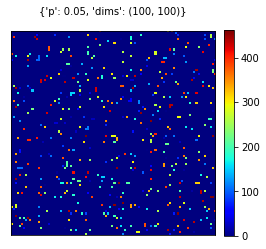

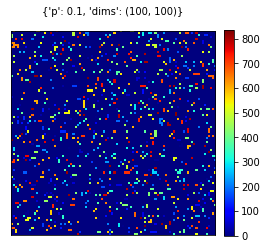

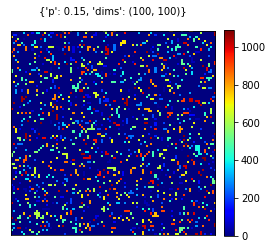

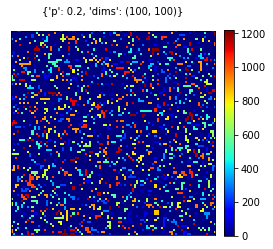

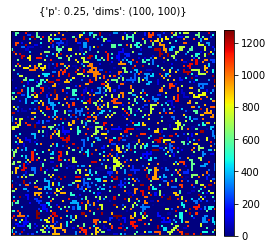

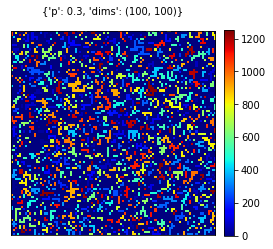

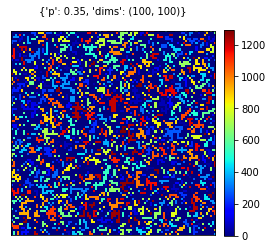

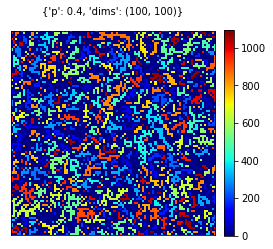

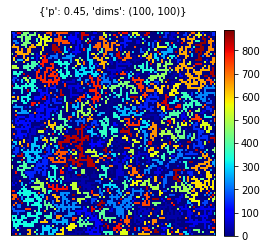

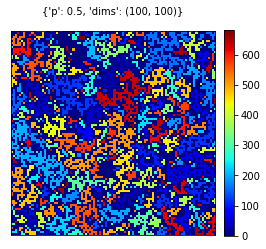

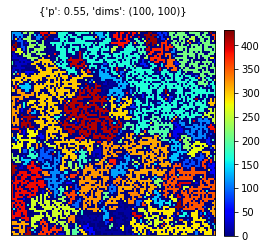

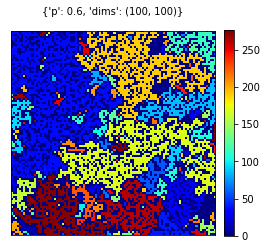

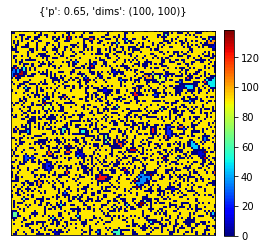

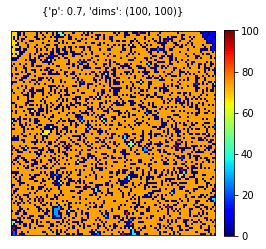

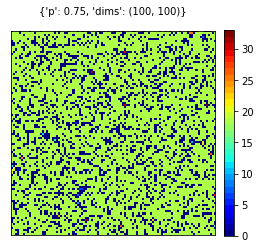

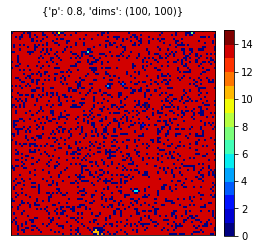

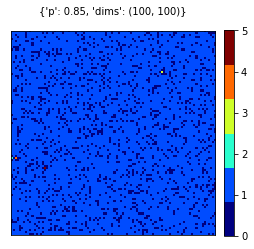

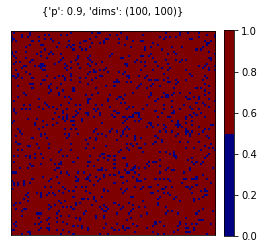

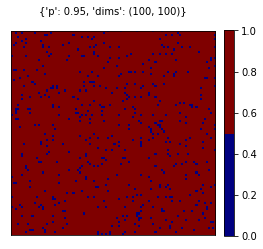

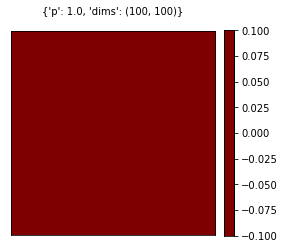

In [15]:
# You can change the parameters below.
NRANDOM = 50
DIMS = (100,100)

pExplore = np.linspace(0,1,21)[1:]
pExpand = np.linspace(0.5,0.64,14)[1:] # Update this array to find more accurate estimation.
expResults = list()
for n in range(NRANDOM):
    
    # You can run simulation for pExplore and pExpand values seperately and repeat pExpand if needed.
     for pval in pExplore:   
    #for pval in pExpand: 
        rgrid = create_grid(DIMS, pval)
        cgrid, clusters = find_clusters(rgrid)
        pgrid, pclusters = check_percolation(rgrid, clusters)
        
    
        if n == 0:
            # Sample one outcome for each parameter
            visualize_grid(cgrid, {'p':np.round(pval,4), 'dims':dims},figname='/content/gdrive/MyDrive/percolation-figures/percvis_p{:.4f}.pdf'.format(pval))
        
        # I recommend keeping all the experiment results in a file, 
        # so that you will have them all before your analysis
        expResults.append({
            'p': pval,
            'idx': n,
            'dim': DIMS,
            'isPercolated': pclusters != None,
            'clusters': clusters,
            'pclulen' : len(pclusters[0]) if pclusters!=None else 0
        })
        #print({k:v for k,v in expResults[-1].items() if k != 'clusters'})
        
        # Let's keep the latest experiment result on a file
        with open('/content/gdrive/MyDrive/percolation-figures/percolation_experiments.jsons', 'a') as fl:
            fl.write('{}\n'.format(json.dumps(expResults[-1])))
        


## Analyze outputs

In [16]:
expRes = dict()
with open('/content/gdrive/MyDrive/percolation-figures/percolation_experiments.jsons', 'r') as fl:
    for i,line in enumerate(fl):
        expRes[i] = json.loads(line.strip())
expDf = pd.DataFrame.from_dict(expRes, orient='index')

In [17]:
expDf

,p,idx,dim,isPercolated,clusters,pclulen
0,0.510769,0,"[100, 100]",False,"[[], [[56, 46]], [[93, 94]], [[0, 76]], [[51, ...",0
1,0.521538,0,"[100, 100]",False,"[[], [[34, 47]], [[78, 24]], [[71, 89]], [[92,...",0
2,0.532308,0,"[100, 100]",False,"[[], [[60, 54]], [[43, 78]], [[54, 91]], [[86,...",0
3,0.543077,0,"[100, 100]",False,"[[], [[55, 93]], [[45, 11]], [[63, 97]], [[99,...",0
4,0.553846,0,"[100, 100]",False,"[[], [[70, 85]], [[95, 27]], [[14, 71]], [[94,...",0
...,...,...,...,...,...,...
1645,0.800000,49,"[100, 100]",True,"[[], [[27, 78]], [[35, 27]], [[14, 82]], [[34,...",7946
1646,0.850000,49,"[100, 100]",True,"[[], [[36, 62]], [[36, 16]], [[39, 46]], [[44,...",8528
1647,0.900000,49,"[100, 100]",True,"[[], [[41, 62]], [[0, 0], [0, 1], [0, 2], [0, ...",9031
1648,0.950000,49,"[100, 100]",True,"[[], [[0, 0], [0, 1], [0, 2], [0, 3], [0, 5], ...",9508


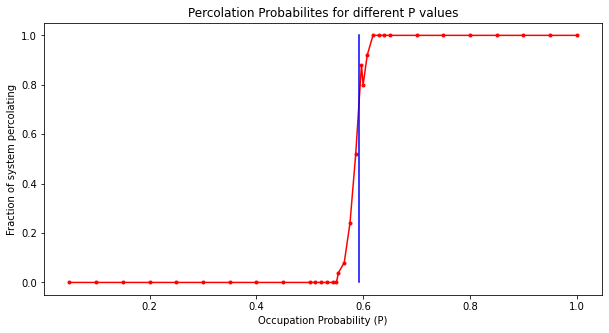

In [18]:
percolatedCounts = {}
for line in expDf.iterrows():
  if(line[1].isPercolated==True):
    if (line[1].p not in percolatedCounts):
      percolatedCounts[line[1].p] = 1
    else:
      percolatedCounts[line[1].p] += 1
  else:
    if (line[1].p not in percolatedCounts):
      percolatedCounts[line[1].p] = 0
for key in percolatedCounts:
  percolatedCounts[key]/=NRANDOM
percolatedCounts = dict(sorted(percolatedCounts.items()))
plt.figure(figsize=(10,5))
plt.plot(list(percolatedCounts.keys()),list(percolatedCounts.values()),marker='o',color='r',markersize=3)
plt.plot([0.59274]*11,[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],color='b')
plt.title("Percolation Probabilites for different P values")
plt.xlabel("Occupation Probability (P)")
plt.ylabel("Fraction of system percolating")
plt.show()

In [19]:
averageClusterS = {}
for line in expDf.iterrows():
  sumC = 0
  clusters = line[1].clusters
  for c in clusters:
    sumC+=len(c)
  if (line[1].pclulen!=None):
    sumC-=line[1].pclulen
  avgC = sumC/(len(clusters)-1) # clusters have an empty cluster in beginning, we remove its effect by using one smaller len
  if (line[1].p not in averageClusterS):
    averageClusterS[line[1].p] = [avgC]
  else:
    averageClusterS[line[1].p].append(avgC)

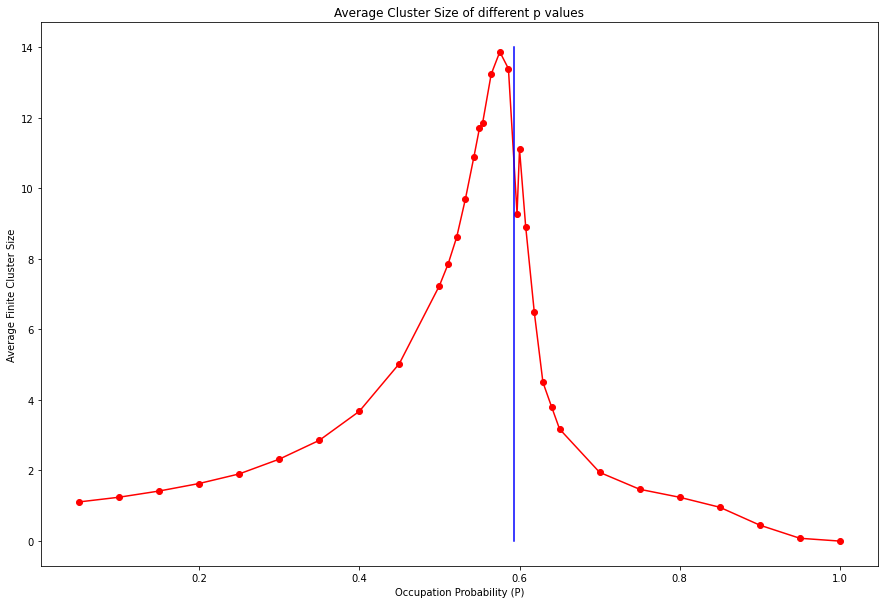

In [20]:
plt.figure(figsize=(15,10))
xl = sorted(list(averageClusterS.keys()))
averageClusterS_ = {}
for index,x in enumerate(xl):
  xl[index] = str(x)[0:4]
  averageClusterS_[x] = sum(averageClusterS[x]) / len(averageClusterS[x])
plt.plot(list(averageClusterS_.keys()), list(averageClusterS_.values()), color='r',marker='o')
plt.plot([0.59274]*15,range(15),color='b')
plt.title("Average Cluster Size of different p values")
plt.xlabel("Occupation Probability (P)")
plt.ylabel("Average Finite Cluster Size")
plt.show()

In [ ]:
p_inf = {}
for line in expDf.iterrows():
  clusters = line[1].clusters
  sumOthers=0
  largestClusterSize = 0
  for c in clusters:
    if (len(c)>largestClusterSize):
      largestClusterSize=len(c)
  if (line[1].p not in p_inf):
    p_inf[line[1].p] = [largestClusterSize/(DIMS[0] * DIMS[1])]
  else:
    p_inf[line[1].p].append(largestClusterSize/(DIMS[0] * DIMS[1]))

In [ ]:
keys = sorted(list(p_inf.keys()))
means={}
stds={}
for key in keys:
  means[key] = statistics.mean(p_inf[key])
  stds[key] = statistics.stdev(p_inf[key])
for index,key in enumerate(keys):
  keys[index] = str(key)[0:4]

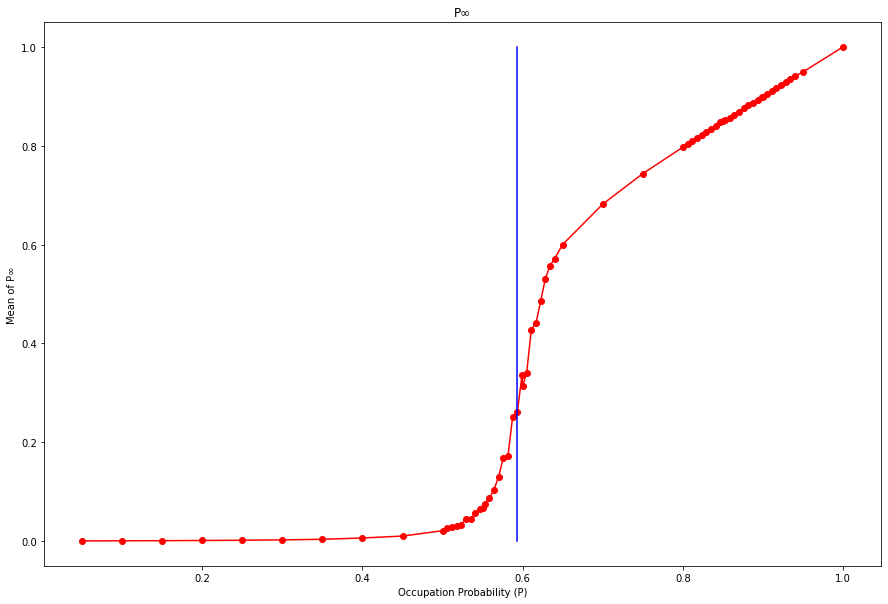

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(means.keys()),list(means.values()),color='r',marker='o')
plt.plot([0.59274]*11,[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],color='b')
plt.title("P∞")
plt.xlabel("Occupation Probability (P)")
plt.ylabel("Mean of P∞")
plt.show()

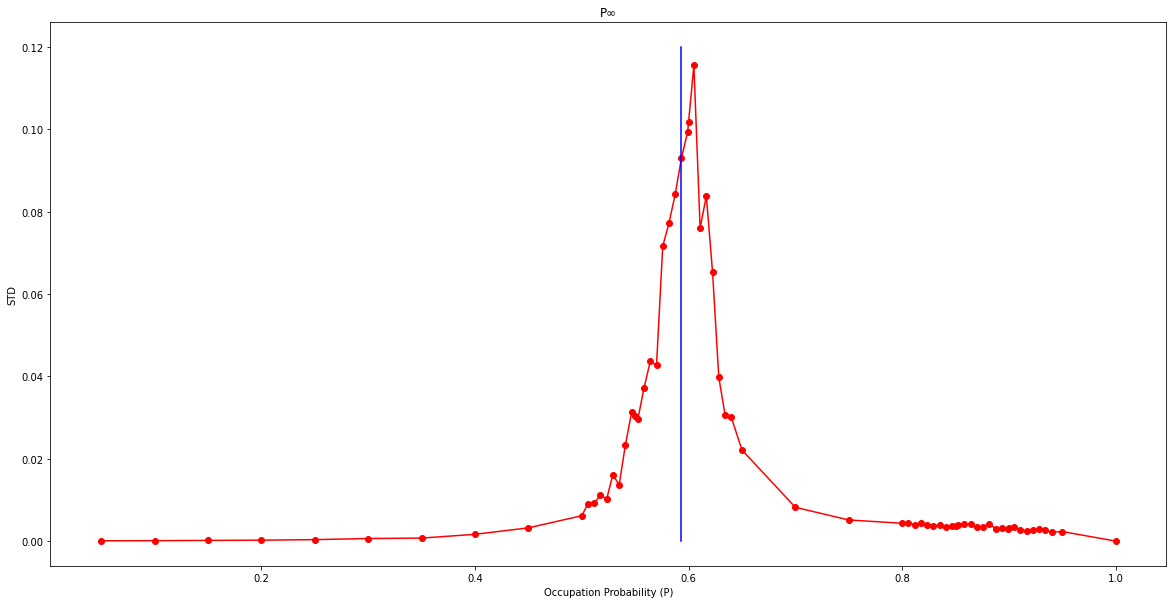

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(stds.keys()),list(stds.values()),color='r',marker='o')
plt.plot([0.59274]*13,[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12],color='b')
plt.title("P∞")
plt.xlabel("Occupation Probability (P)")
plt.ylabel("STD")
plt.show()